1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sb

In [2]:
N = 100
mean = 1
std = 0.4
x = np.random.normal(loc=mean, scale=std, size=N)

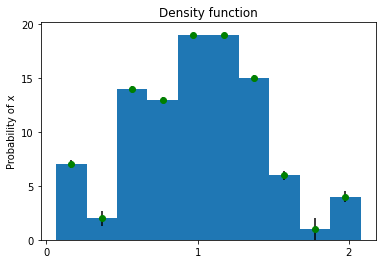

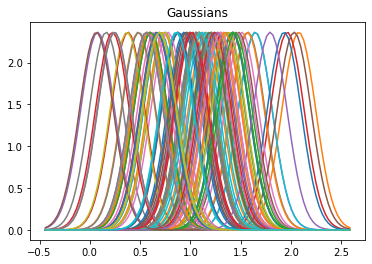

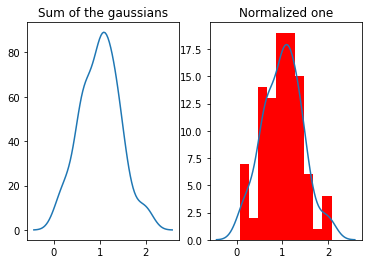

In [3]:
# first point of the list
fig, ax = plt.subplots()
n_bins = 10
n, bins, _ = ax.hist(x, n_bins)

# second point of the list
ax.set_ylabel("Probability of x")

# third point of the list
ax.locator_params(integer = True)


p = bins[:-1] + 0.5 * (bins[1] - bins[0])
ax.scatter(p, n, color="g", zorder=10)

ax.errorbar(p, n, yerr=1/(n**0.5), fmt=".", ecolor="k")
ax.set_title("Density function")
plt.show()


std_def = 1.06 * std * N**(-1/5)

fig, ax = plt.subplots()
plt.title("Gaussians")
gaussians = []
x_space = np.linspace(np.min(x) - 3*std_def, np.max(x) + 3*std_def, N)
for xi in x:
    rv = sp.stats.norm(xi, std_def)
    gaussians.append(rv.pdf(x_space))
    ax.plot(x_space, gaussians[-1])
plt.show()


sum_g = np.sum(gaussians, axis=0)

normalized_g = sum_g / sp.integrate.trapz(sum_g, x_space) * N * (bins[1] - bins[0])


fig, ax = plt.subplots(1,2)
ax[0].plot(x_space, sum_g)
ax[0].set_title("Sum of the gaussians")
ax[1].plot(x_space, normalized_g)
ax[1].hist(x, n_bins, color="r")
ax[1].set_title("Normalized one")
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

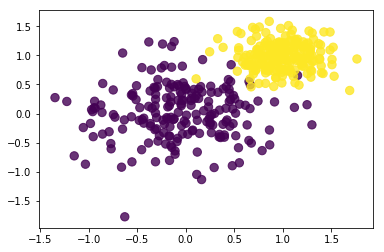

In [4]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

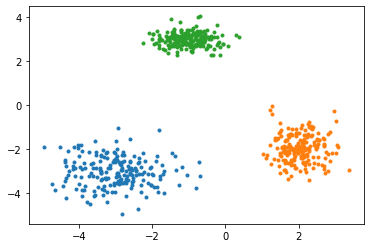

In [5]:
np.random.seed(4)
num_of_2dGaussians = 3
mean = np.random.randint(7, size=(num_of_2dGaussians, 2)) - 3
cov_vals = np.random.randint(8, size=(num_of_2dGaussians, 2)) / 10
cov = []

for pairs in cov_vals:
    cov.append([[pairs[0], 0], [0, pairs[1]]])
    
    
while (num_of_2dGaussians > 0):
    
    x, y  = np.random.multivariate_normal(mean[num_of_2dGaussians-1], cov[num_of_2dGaussians-1], 200).T
    plt.plot(x, y, '.')
    num_of_2dGaussians -= 1

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [6]:
temp = np.load('residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(temp)
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [7]:
df = df[np.abs(df['residuals']) < 2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


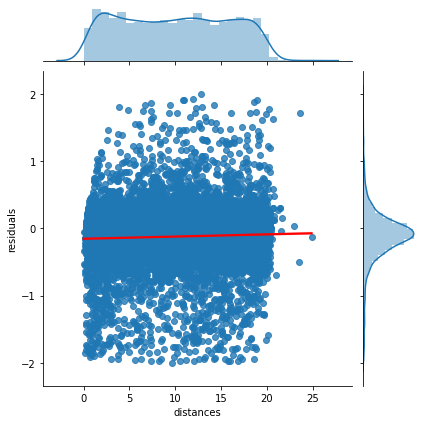

In [8]:
lin = sp.stats.linregress(df['distances'], df['residuals'])
sb.jointplot( df['distances'], df['residuals'], kind='reg',
             line_kws={'color':'r', 'label':'regression line: y={0:.3f}x+{1:.3f}'.format(lin[0],lin[1])})
plt.show()

<ipython-input-9-65f8f6e16a67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bins"] = np.floor(df["distances"] / dist)


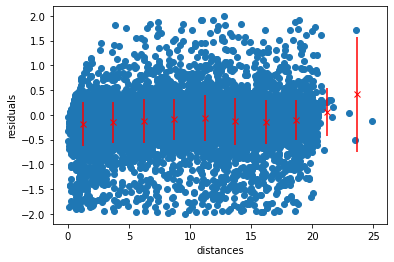

In [9]:
n_bins = 10
x = np.linspace(df['distances'].min(), df['distances'].max(), n_bins+1)
dist = x[1] - x[0]
x = x[:-1] + dist / 2
df["bins"] = np.floor(df["distances"] / dist)
y = df.groupby('bins').mean()["residuals"]
erry = df.groupby('bins').std()["residuals"]
y.drop(y.tail(1).index, inplace=True)
erry.drop(erry.tail(1).index, inplace=True)

plt.scatter(df['distances'], df['residuals'])
plt.errorbar(x, y, erry, color="r", linestyle='none', marker="x")
plt.xlabel("distances")
plt.ylabel("residuals")
plt.show()